In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from math import pi

pokemon = pd.read_csv("Pokemon.csv")
#                       , index_col = "#")

In [2]:
pokemon.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# Removes Legendary Pokemon from data
pokemon = pokemon.drop(pokemon[pokemon.Legendary == 1].index)
# Removes Legendary column since it is no longer needed
pokemon = pokemon.drop(["Legendary"], axis = 1)
# Removes Mega Evoled Pokemon from data
pokemon = pokemon.drop_duplicates(subset = "#", keep = "first")
#Sets Pokemon ID number as index
pokemon = pokemon.set_index("#")
pokemon.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1


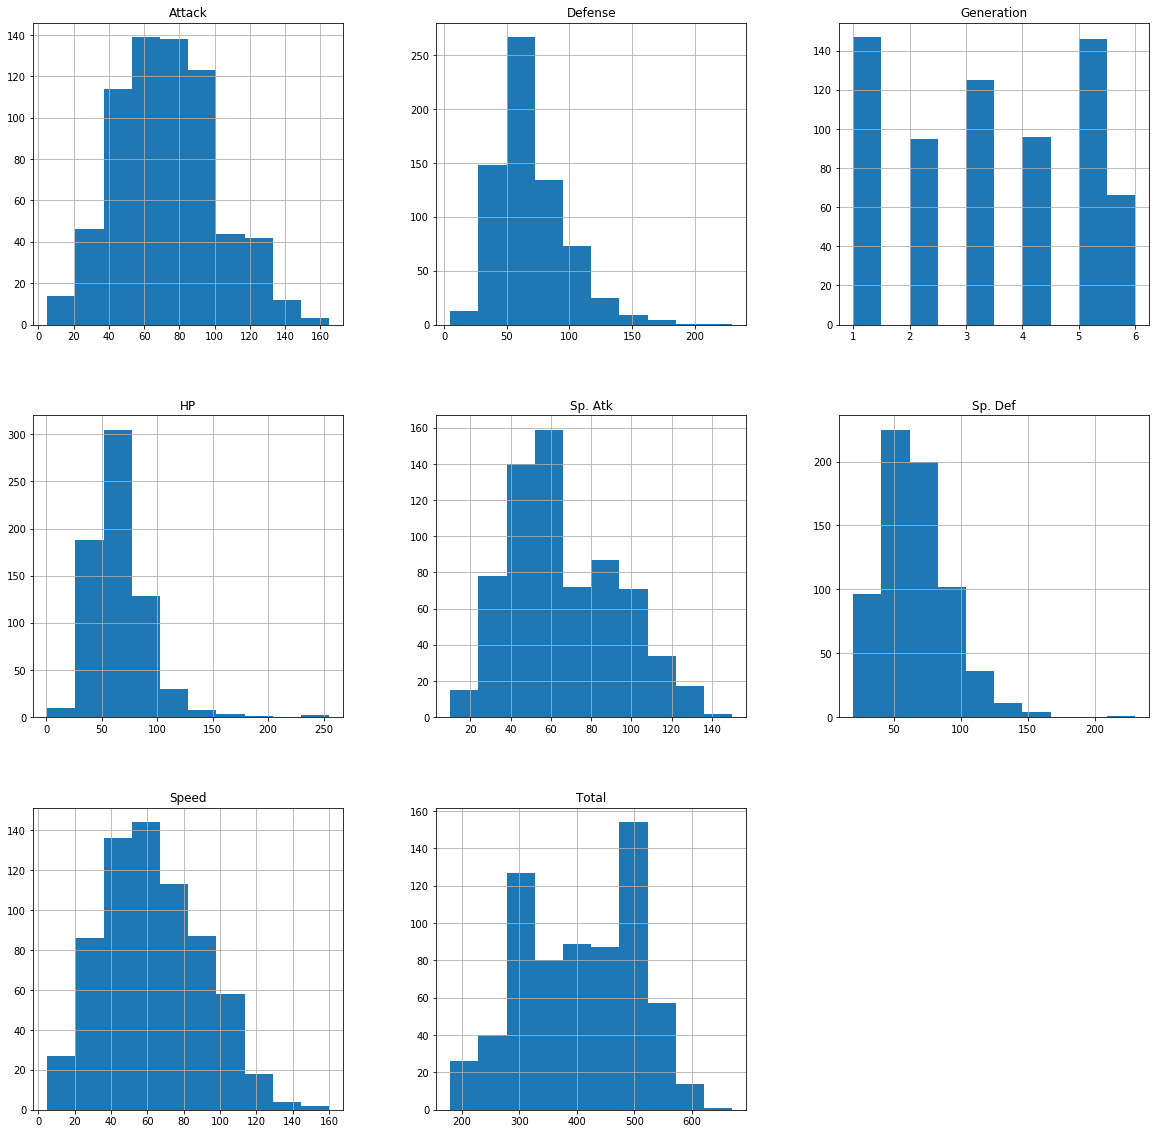

In [4]:
# pokemon.Legendary.replace({True:1,False:0},inplace=True)
# print(pokemon.to_string())

# Shows overall stats of every Pokemon(Gen 1 - Gen 6)
p = pokemon.hist(figsize = (20,20))

In [5]:
# print(pokemon["Legendary"].value_counts())
# print()
print(pokemon["Type 1"].value_counts())
print()
print(pokemon["Type 2"].value_counts())

Water       102
Normal       91
Grass        64
Bug          63
Fire         42
Psychic      39
Rock         38
Electric     33
Ground       28
Poison       28
Dark         26
Fighting     25
Ghost        22
Ice          21
Steel        18
Dragon       17
Fairy        16
Flying        2
Name: Type 1, dtype: int64

Flying      78
Poison      31
Ground      29
Psychic     24
Steel       18
Grass       18
Fairy       17
Dark        16
Fighting    16
Rock        14
Water       12
Ghost       11
Dragon      11
Ice          9
Fire         7
Electric     5
Normal       4
Bug          3
Name: Type 2, dtype: int64


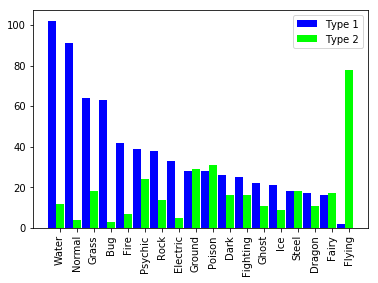

In [6]:
# Plot data
Type1 = [pokemon['Type 1'].value_counts()[key] for key in pokemon['Type 1'].value_counts().index]
Type2 = [pokemon['Type 2'].value_counts()[key] for key in pokemon['Type 1'].value_counts().index]

# Create plot
index = np.arange(len(pokemon['Type 1'].value_counts().index))
bar_width = .45

plt.pyplot.bar(index, Type1, bar_width, color = 'b', label = 'Type 1')
plt.pyplot.bar(index + bar_width, Type2, bar_width, color = '#00FF00', label = 'Type 2')

plt.pyplot.gca().set_xticklabels(pokemon['Type 1'].value_counts().index)
plt.pyplot.gca().set_xticks(index + bar_width)

plt.pyplot.xticks(rotation=90)
plt.pyplot.legend()
plt.pyplot.show()

In [7]:
# Generation 1
Gen1 = pokemon.drop(pokemon[pokemon.Generation != 1].index)

In [8]:
# Droping unwanted columns
Gen1_T1stats = Gen1.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 1 Pokemon:",len(Gen1_T1stats)))
# Average stats for Generation 1 Pokemon based on type 1
Gen1_T1stats = Gen1_T1stats.groupby("Type 1").mean()
Gen1_T1stats = Gen1_T1stats.round(2)
Gen1_T1stats = Gen1_T1stats.reset_index()
print(Gen1_T1stats.to_string())

Number of Gen 1 Pokemon: 147
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  55.42   63.75    57.08    47.50    55.42  57.08
1     Dragon  64.33   94.00    68.33    73.33    73.33  66.67
2   Electric  50.00   58.50    62.12    86.88    71.25  98.75
3      Fairy  82.50   57.50    60.50    77.50    77.50  47.50
4   Fighting  63.57  102.86    61.00    45.00    73.57  66.14
5       Fire  61.45   82.45    60.09    80.91    75.91  83.45
6      Ghost  45.00   50.00    45.00   115.00    55.00  95.00
7      Grass  65.00   70.67    69.58    87.92    64.17  52.08
8     Ground  58.12   81.88    86.25    39.38    50.62  58.12
9        Ice  65.00   50.00    35.00   115.00    95.00  95.00
10    Normal  78.68   67.73    53.55    51.27    59.86  69.32
11    Poison  64.50   74.43    67.00    57.14    61.64  58.79
12   Psychic  57.86   53.00    52.86    96.57    92.14  87.71
13      Rock  53.89   82.22   110.00    60.56    55.56  58.33
14     Water  64.54   70.25    77.50    6

In [9]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen1_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot

    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen1_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

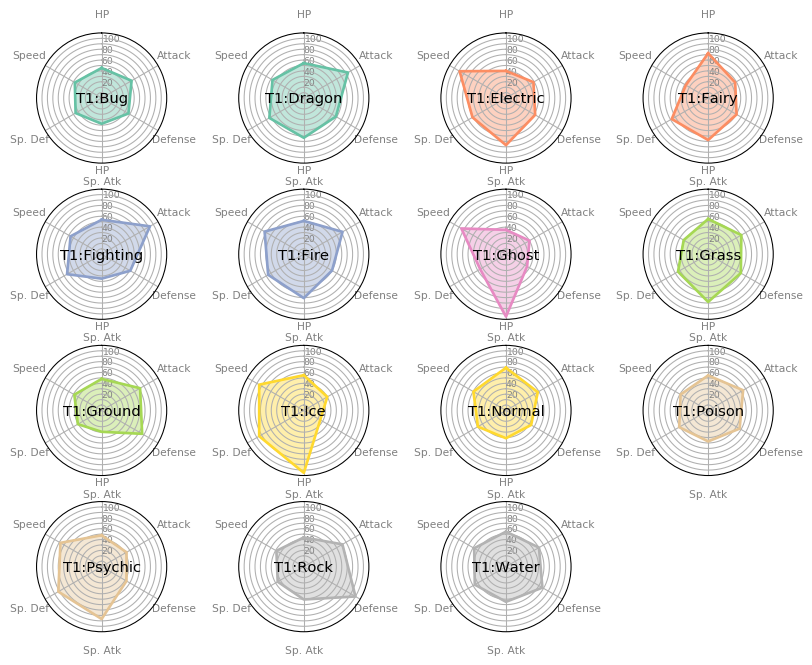

In [10]:
my_dpi=96
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen1_T1stats.index))

for row in range(0, len(Gen1_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen1_T1stats['Type 1'][row], color=my_palette(row))

In [11]:
# Generation 2
Gen2 = pokemon.drop(pokemon[pokemon.Generation != 2].index)

In [12]:
# Droping unwanted columns
Gen2_T1stats = Gen2.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 2 Pokemon:",len(Gen2_T1stats)))
# Average stats for Generation 2 Pokemon based on type 1
Gen2_T1stats = Gen2_T1stats.groupby("Type 1").mean()
Gen2_T1stats = Gen2_T1stats.round(2)
Gen2_T1stats = Gen2_T1stats.reset_index()
print(Gen2_T1stats.to_string())

Number of Gen 2 Pokemon: 95
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def   Speed
0        Bug  56.50   69.00    87.00    47.00    83.50   51.50
1       Dark  66.00   79.00    57.40    74.00    75.40   86.20
2   Electric  56.00   54.60    46.40    72.00    57.00   58.00
3      Fairy  58.00   57.00    60.60    53.00    65.00   30.00
4   Fighting  42.50   65.00    65.00    35.00    72.50   52.50
5       Fire  51.67   60.83    62.67    78.17    62.50   63.00
6      Ghost  60.00   60.00    60.00    85.00    85.00   85.00
7      Grass  58.89   57.00    65.00    61.67    75.00   59.44
8     Ground  81.67   85.00    95.00    45.00    55.00   58.33
9        Ice  60.00   58.75    45.00    60.00    50.00   60.00
10    Normal  87.20   63.13    54.00    58.47    66.13   62.00
11    Poison  85.00   90.00    80.00    70.00    80.00  130.00
12   Psychic  84.67   65.83    63.50    83.33    69.33   76.00
13      Rock  72.50   95.50    86.25    58.75    71.25   45.75
14     Steel  70.00   82.50

In [13]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen2_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen2_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

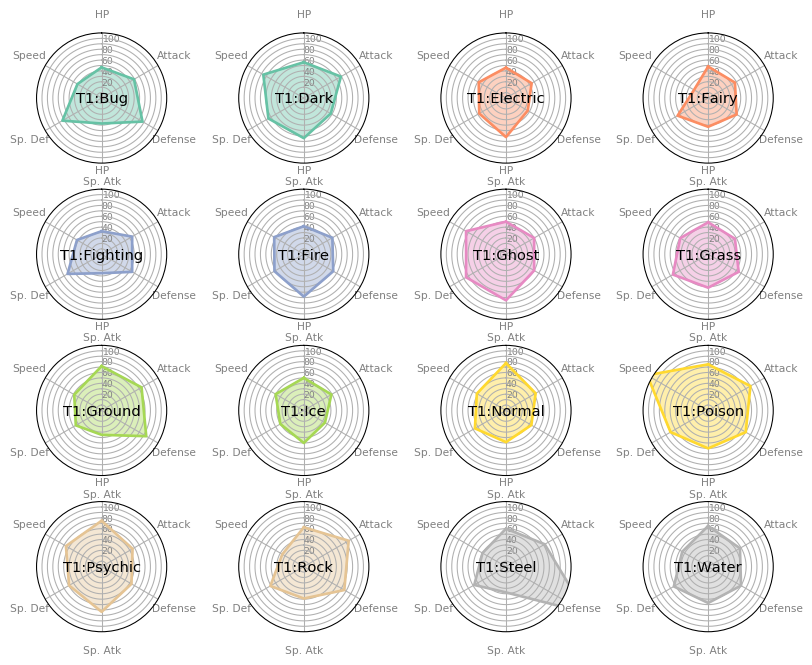

In [14]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen2_T1stats.index))

for row in range(0, len(Gen2_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen2_T1stats['Type 1'][row], color=my_palette(row))

In [15]:
# Generation 3
Gen3 = pokemon.drop(pokemon[pokemon.Generation != 3].index)

In [16]:
# Droping unwanted columns
Gen3_T1stats = Gen3.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 3 Pokemon:",len(Gen3_T1stats)))
# Average stats for Generation 3 Pokemon based on type 1
Gen3_T1stats = Gen3_T1stats.groupby("Type 1").mean()
Gen3_T1stats = Gen3_T1stats.round(2)
Gen3_T1stats = Gen3_T1stats.reset_index()
print(Gen3_T1stats.to_string())

Number of Gen 3 Pokemon: 125
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  49.83   55.83    54.08    48.33    51.17  59.58
1       Dark  55.00   87.50    60.00    57.50    53.75  57.50
2     Dragon  70.00   93.75    82.50    70.00    66.25  70.00
3   Electric  57.50   52.50    47.50    82.50    65.00  90.00
4   Fighting  76.50   70.00    55.00    40.00    55.00  53.75
5       Fire  64.17   85.00    70.00    86.67    61.67  45.83
6      Ghost  42.00   75.00    80.00    59.00    79.00  40.00
7      Grass  62.42   75.25    55.25    75.58    60.17  63.83
8     Ground  55.00   76.00    67.00    57.00    73.00  62.00
9        Ice  80.00   62.00    68.00    71.00    68.00  53.00
10    Normal  68.67   69.89    57.28    53.22    55.06  65.78
11    Poison  81.00   72.00    65.33    72.00    65.33  53.33
12   Psychic  62.00   38.29    49.00    73.29    74.71  56.86
13      Rock  63.14   76.71    87.00    63.86    80.57  50.86
14     Steel  58.57   88.57   116.43    5

In [17]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen3_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen3_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

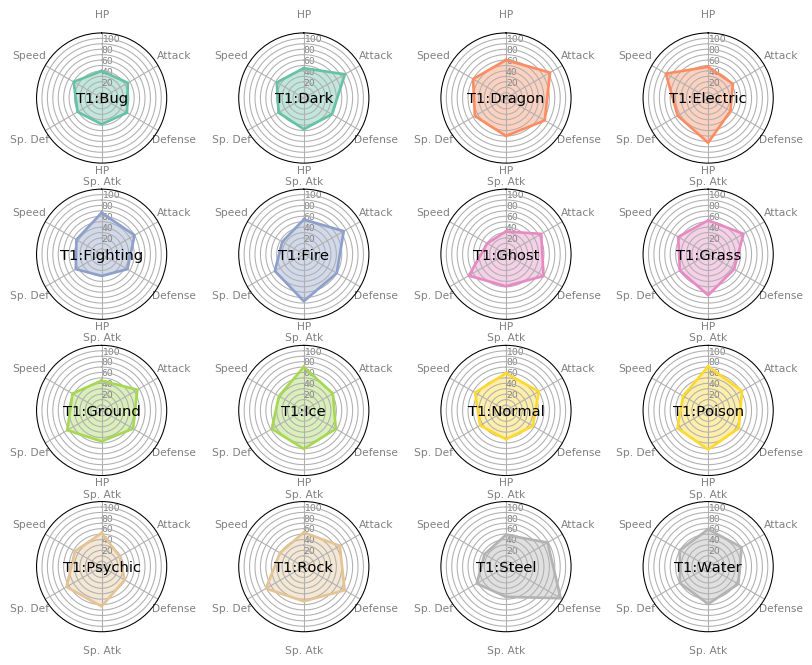

In [18]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen3_T1stats.index))

for row in range(0, len(Gen3_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen3_T1stats['Type 1'][row], color=my_palette(row))

In [19]:
# Generation 4
Gen4 = pokemon.drop(pokemon[pokemon.Generation != 4].index)

In [20]:
# Droping unwanted columns
Gen4_T1stats = Gen4.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 4 Pokemon:",len(Gen4_T1stats)))
# Average stats for Generation 4 Pokemon based on type 1
Gen4_T1stats = Gen4_T1stats.groupby("Type 1").mean()
Gen4_T1stats = Gen4_T1stats.round(2)
Gen4_T1stats = Gen4_T1stats.reset_index()
print(Gen4_T1stats.to_string())

Number of Gen 4 Pokemon: 96
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  58.75   59.75    62.75    63.50    61.50  54.12
1       Dark  85.00  122.50    58.50    75.00    68.50  98.00
2     Dragon  78.00   96.67    68.33    56.67    61.67  75.33
3   Electric  62.86   79.71    70.14    80.00    72.00  73.71
4      Fairy  85.00   50.00    95.00   120.00   115.00  80.00
5   Fighting  55.00   90.00    55.00    75.00    55.00  75.00
6       Fire  64.75   83.75    58.50    91.25    65.50  83.25
7      Ghost  79.00   76.40    76.20    82.40    89.20  67.00
8      Grass  69.08   77.08    76.75    76.08    70.25  56.58
9     Ground  91.50  104.75   112.75    51.50    61.00  53.50
10       Ice  81.67   90.00    86.67    93.33    75.00  85.00
11    Normal  75.93   71.93    53.67    55.73    60.40  74.00
12    Poison  67.83   77.17    69.83    58.17    56.17  75.50
13   Psychic  63.25   62.50    70.00    68.75    96.25  67.50
14      Rock  60.67   86.50   104.33    44

In [21]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen4_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen4_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

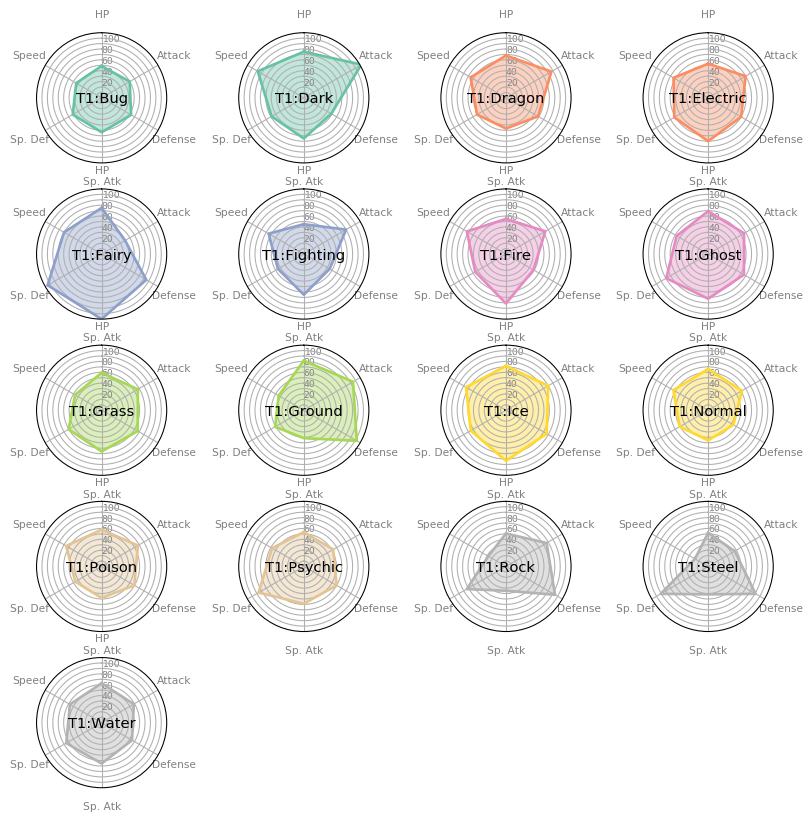

In [22]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen4_T1stats.index))

for row in range(0, len(Gen4_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen4_T1stats['Type 1'][row], color=my_palette(row))

In [23]:
# Generation 5
Gen5 = pokemon.drop(pokemon[pokemon.Generation != 5].index)

In [24]:
# Droping unwanted columns
Gen5_T1stats = Gen5.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 5 Pokemon:",len(Gen5_T1stats)))
# Average stats for Generation 5 Pokemon based on type 1
Gen5_T1stats = Gen5_T1stats.groupby("Type 1").mean()
Gen5_T1stats = Gen5_T1stats.round(2)
Gen5_T1stats = Gen5_T1stats.reset_index()
print(Gen5_T1stats.to_string())

Number of Gen 5 Pokemon: 146
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  59.11   77.61    78.28    62.89    66.94  71.28
1       Dark  63.54   81.38    71.69    65.62    65.54  70.15
2     Dragon  66.25  117.75    77.50    47.50    62.50  67.25
3   Electric  60.00   81.67    57.50    71.67    57.50  74.17
4   Fighting  81.43  108.57    72.14    47.14    60.00  60.00
5       Fire  81.25   94.62    55.25    64.50    55.25  67.50
6      Ghost  53.20   41.00    87.00    91.00    75.00  43.00
7      Grass  64.00   63.57    72.14    67.79    70.71  61.50
8     Ground  79.00   94.38    59.25    49.50    61.12  63.62
9        Ice  63.00   73.33    58.33    80.00    80.83  62.83
10    Normal  72.35   82.06    64.88    51.65    64.06  71.18
11    Poison  65.00   72.50    72.00    50.00    72.00  70.00
12   Psychic  70.08   48.85    62.92    92.23    71.77  50.08
13      Rock  68.00  113.40    86.00    64.20    51.00  48.00
14     Steel  53.33   78.33    93.33    6

In [25]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen5_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen5_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

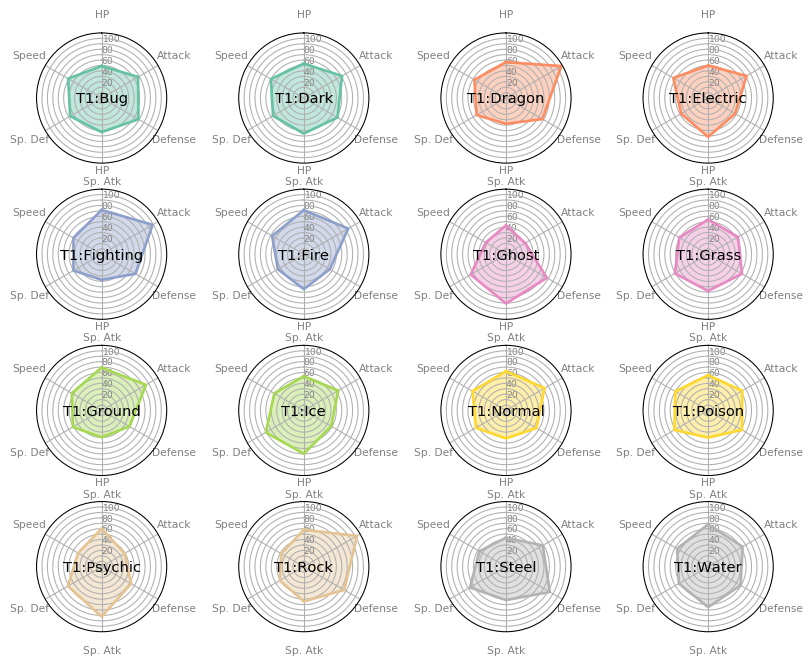

In [26]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen5_T1stats.index))

for row in range(0, len(Gen5_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen5_T1stats['Type 1'][row], color=my_palette(row))

In [27]:
# Generation 6
Gen6 = pokemon.drop(pokemon[pokemon.Generation != 6].index)

In [28]:
# Droping unwanted columns
Gen6_T1stats = Gen6.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 6 Pokemon:",len(Gen6_T1stats)))
# Average stats for Generation 6 Pokemon based on type 1
Gen6_T1stats = Gen6_T1stats.groupby("Type 1").mean()
Gen6_T1stats = Gen6_T1stats.round(2)
Gen6_T1stats = Gen6_T1stats.reset_index()
print(Gen6_T1stats.to_string())

Number of Gen 6 Pokemon: 66
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  54.33   36.33    50.00    48.00    35.00  51.00
1       Dark  69.50   73.00    70.50    52.50    60.50  59.00
2     Dragon  67.67   75.00    52.67    82.67   112.67  60.00
3   Electric  57.67   50.33    47.33    83.67    68.00  93.33
4      Fairy  74.25   58.12    62.88    83.00    93.38  50.25
5   Fighting  80.00   99.33    71.67    63.00    60.67  73.00
6       Fire  66.00   63.57    60.86    82.57    67.29  89.29
7     Flying  62.50   50.00    57.50    71.00    60.00  89.00
8      Ghost  60.50   84.00    79.00    54.25    68.00  57.25
9      Grass  78.80   82.20    78.40    67.40    63.20  55.80
10       Ice  75.00   93.00   134.50    38.00    40.50  28.00
11    Normal  60.75   55.50    54.50    46.75    60.25  74.75
12    Poison  57.50   67.50    75.00    78.50    91.50  37.00
13   Psychic  68.00   48.00    65.00    73.00    70.50  86.00
14      Rock  72.00   79.00    92.86    60

In [29]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen6_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen6_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

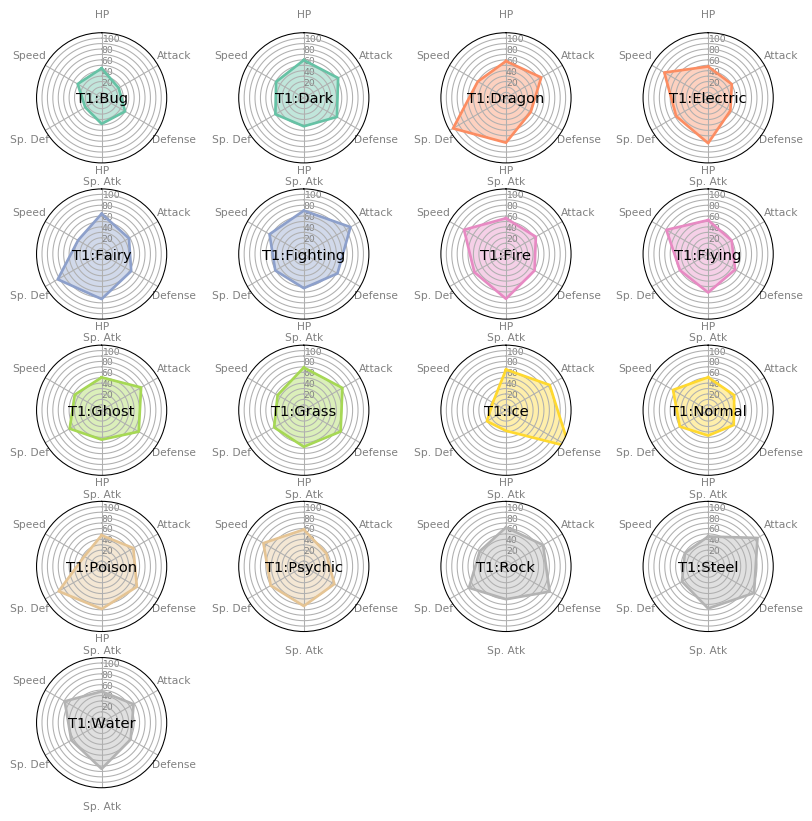

In [30]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen6_T1stats.index))

for row in range(0, len(Gen6_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen6_T1stats['Type 1'][row], color=my_palette(row))

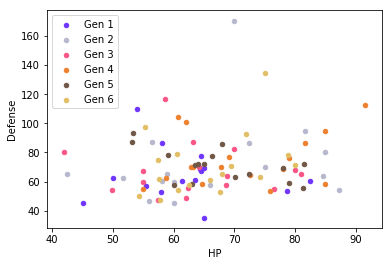

In [31]:
ax1 = Gen1_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#6F35FC", label = 'Gen 1')
ax2 = Gen2_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#B7B7CE", label = 'Gen 2', ax =ax1)
ax3 = Gen3_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#F95587", label = 'Gen 3', ax =ax1)
ax4 = Gen4_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#EE8130", label = 'Gen 4', ax =ax1)
ax5 = Gen5_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#705746", label = 'Gen 5', ax =ax1)
ax6 = Gen6_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#E2BF65", label = 'Gen 6', ax =ax1)


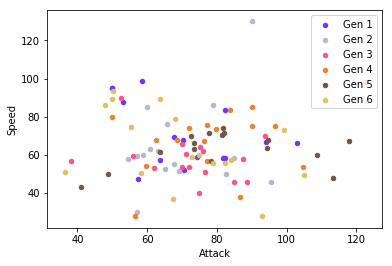

In [32]:
ax1 = Gen1_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#6F35FC", label = 'Gen 1')
ax2 = Gen2_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#B7B7CE", label = 'Gen 2', ax =ax1)
ax3 = Gen3_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#F95587", label = 'Gen 3', ax =ax1)
ax4 = Gen4_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#EE8130", label = 'Gen 4', ax =ax1)
ax5 = Gen5_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#705746", label = 'Gen 5', ax =ax1)
ax6 = Gen6_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#E2BF65", label = 'Gen 6', ax =ax1)

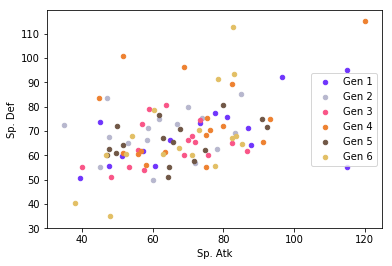

In [33]:
ax1 = Gen1_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#6F35FC", label = 'Gen 1')
ax2 = Gen2_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#B7B7CE", label = 'Gen 2', ax =ax1)
ax3 = Gen3_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#F95587", label = 'Gen 3', ax =ax1)
ax4 = Gen4_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#EE8130", label = 'Gen 4', ax =ax1)
ax5 = Gen5_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#705746", label = 'Gen 5', ax =ax1)
ax6 = Gen6_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#E2BF65", label = 'Gen 6', ax =ax1)

In [34]:
# Reseting to get Total column back
Gen1_T1stats = Gen1.drop(["Name", "Generation"], axis = 1)
Gen1_T1stats = Gen1_T1stats.groupby("Type 1").mean()
Gen1_T1stats = Gen1_T1stats.round(2)
Gen1_T1stats = Gen1_T1stats.reset_index()

# Reseting to get Total column back
Gen2_T1stats = Gen2.drop(["Name", "Generation"], axis = 1)
Gen2_T1stats = Gen2_T1stats.groupby("Type 1").mean()
Gen2_T1stats = Gen2_T1stats.round(2)
Gen2_T1stats = Gen2_T1stats.reset_index()

# Reseting to get Total column back
Gen3_T1stats = Gen3.drop(["Name", "Generation"], axis = 1)
Gen3_T1stats = Gen3_T1stats.groupby("Type 1").mean()
Gen3_T1stats = Gen3_T1stats.round(2)
Gen3_T1stats = Gen3_T1stats.reset_index()

# Reseting to get Total column back
Gen4_T1stats = Gen4.drop(["Name", "Generation"], axis = 1)
Gen4_T1stats = Gen4_T1stats.groupby("Type 1").mean()
Gen4_T1stats = Gen4_T1stats.round(2)
Gen4_T1stats = Gen4_T1stats.reset_index()

# Reseting to get Total column back
Gen5_T1stats = Gen5.drop(["Name", "Generation"], axis = 1)
Gen5_T1stats = Gen5_T1stats.groupby("Type 1").mean()
Gen5_T1stats = Gen5_T1stats.round(2)
Gen5_T1stats = Gen5_T1stats.reset_index()

# Reseting to get Total column back
Gen6_T1stats = Gen6.drop(["Name", "Generation"], axis = 1)
Gen6_T1stats = Gen6_T1stats.groupby("Type 1").mean()
Gen6_T1stats = Gen6_T1stats.round(2)
Gen6_T1stats = Gen6_T1stats.reset_index()

In [35]:
# Average stats for All Generation Pokemon based on type 1
frames = [Gen1_T1stats,Gen2_T1stats,Gen3_T1stats
          ,Gen4_T1stats,Gen5_T1stats,Gen6_T1stats]
poke_stats = pd.concat(frames)
# poke_stats.head(20)
print(poke_stats)

      Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def   Speed
0        Bug  336.25  55.42   63.75    57.08    47.50    55.42   57.08
1     Dragon  440.00  64.33   94.00    68.33    73.33    73.33   66.67
2   Electric  427.50  50.00   58.50    62.12    86.88    71.25   98.75
3      Fairy  403.00  82.50   57.50    60.50    77.50    77.50   47.50
4   Fighting  412.14  63.57  102.86    61.00    45.00    73.57   66.14
5       Fire  444.27  61.45   82.45    60.09    80.91    75.91   83.45
6      Ghost  405.00  45.00   50.00    45.00   115.00    55.00   95.00
7      Grass  409.42  65.00   70.67    69.58    87.92    64.17   52.08
8     Ground  374.38  58.12   81.88    86.25    39.38    50.62   58.12
9        Ice  455.00  65.00   50.00    35.00   115.00    95.00   95.00
10    Normal  380.41  78.68   67.73    53.55    51.27    59.86   69.32
11    Poison  383.50  64.50   74.43    67.00    57.14    61.64   58.79
12   Psychic  440.14  57.86   53.00    52.86    96.57    92.14   87.71
13    

In [36]:
bug_stats = poke_stats.loc[poke_stats["Type 1"] == "Bug"]
s = pd.Series([1, 2, 3, 4, 5, 6])
bug_stats = bug_stats.set_index([s])
print(bug_stats)

  Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1    Bug  336.25  55.42   63.75    57.08    47.50    55.42  57.08
2    Bug  394.50  56.50   69.00    87.00    47.00    83.50  51.50
3    Bug  318.83  49.83   55.83    54.08    48.33    51.17  59.58
4    Bug  360.38  58.75   59.75    62.75    63.50    61.50  54.12
5    Bug  416.11  59.11   77.61    78.28    62.89    66.94  71.28
6    Bug  274.67  54.33   36.33    50.00    48.00    35.00  51.00


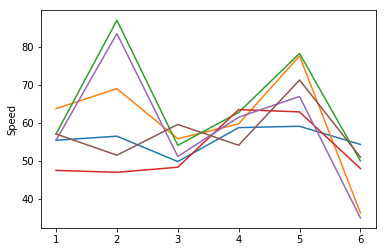

In [37]:
ax = sns.lineplot(x=bug_stats.index, y="HP", data=bug_stats) #blue
ax = sns.lineplot(x=bug_stats.index, y="Attack", data=bug_stats) #orange
ax = sns.lineplot(x=bug_stats.index, y="Defense", data=bug_stats) #green
ax = sns.lineplot(x=bug_stats.index, y="Sp. Atk", data=bug_stats) #red
ax = sns.lineplot(x=bug_stats.index, y="Sp. Def", data=bug_stats) #purple
ax = sns.lineplot(x=bug_stats.index, y="Speed", data=bug_stats) #brown
# ax = sns.lineplot(x=bug_stats.index, y="Total", data=bug_stats) #pink

In [38]:
dark_stats = poke_stats.loc[poke_stats["Type 1"] == "Dark"]
s = pd.Series([2, 3, 4, 5, 6])
dark_stats = dark_stats.set_index([s])
print(dark_stats)

  Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
2   Dark  438.00  66.00   79.00    57.40    74.00    75.40  86.20
3   Dark  371.25  55.00   87.50    60.00    57.50    53.75  57.50
4   Dark  507.50  85.00  122.50    58.50    75.00    68.50  98.00
5   Dark  417.92  63.54   81.38    71.69    65.62    65.54  70.15
6   Dark  385.00  69.50   73.00    70.50    52.50    60.50  59.00


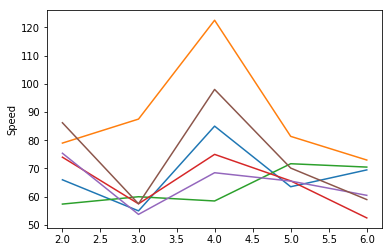

In [39]:
ax = sns.lineplot(x=dark_stats.index, y="HP", data=dark_stats)
ax = sns.lineplot(x=dark_stats.index, y="Attack", data=dark_stats)
ax = sns.lineplot(x=dark_stats.index, y="Defense", data=dark_stats)
ax = sns.lineplot(x=dark_stats.index, y="Sp. Atk", data=dark_stats)
ax = sns.lineplot(x=dark_stats.index, y="Sp. Def", data=dark_stats)
ax = sns.lineplot(x=dark_stats.index, y="Speed", data=dark_stats)
# ax = sns.lineplot(x=dark_stats.index, y="Total", data=dark_stats)

In [40]:
dragon_stats = poke_stats.loc[poke_stats["Type 1"] == "Dragon"]
s = pd.Series([1, 3, 4, 5, 6])
dragon_stats = dragon_stats.set_index([s])
print(dragon_stats)

   Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Dragon  440.00  64.33   94.00    68.33    73.33    73.33  66.67
3  Dragon  452.50  70.00   93.75    82.50    70.00    66.25  70.00
4  Dragon  436.67  78.00   96.67    68.33    56.67    61.67  75.33
5  Dragon  438.75  66.25  117.75    77.50    47.50    62.50  67.25
6  Dragon  450.67  67.67   75.00    52.67    82.67   112.67  60.00


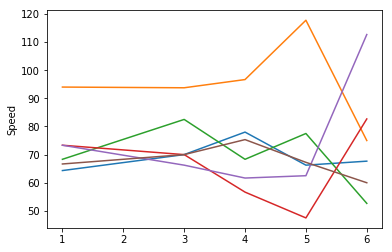

In [41]:
ax = sns.lineplot(x=dragon_stats.index, y="HP", data=dragon_stats)
ax = sns.lineplot(x=dragon_stats.index, y="Attack", data=dragon_stats)
ax = sns.lineplot(x=dragon_stats.index, y="Defense", data=dragon_stats)
ax = sns.lineplot(x=dragon_stats.index, y="Sp. Atk", data=dragon_stats)
ax = sns.lineplot(x=dragon_stats.index, y="Sp. Def", data=dragon_stats)
ax = sns.lineplot(x=dragon_stats.index, y="Speed", data=dragon_stats)
# ax = sns.lineplot(x=dragon_stats.index, y="Total", data=dragon_stats)

In [42]:
electric_stats = poke_stats.loc[poke_stats["Type 1"] == "Electric"]
s = pd.Series([1, 2, 3, 4, 5, 6])
electric_stats = electric_stats.set_index([s])
print(electric_stats)

     Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Electric  427.50  50.00   58.50    62.12    86.88    71.25  98.75
2  Electric  344.00  56.00   54.60    46.40    72.00    57.00  58.00
3  Electric  395.00  57.50   52.50    47.50    82.50    65.00  90.00
4  Electric  438.43  62.86   79.71    70.14    80.00    72.00  73.71
5  Electric  402.50  60.00   81.67    57.50    71.67    57.50  74.17
6  Electric  400.33  57.67   50.33    47.33    83.67    68.00  93.33


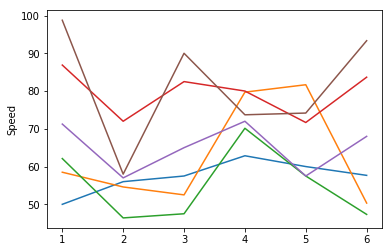

In [43]:
ax = sns.lineplot(x=electric_stats.index, y="HP", data=electric_stats)
ax = sns.lineplot(x=electric_stats.index, y="Attack", data=electric_stats)
ax = sns.lineplot(x=electric_stats.index, y="Defense", data=electric_stats)
ax = sns.lineplot(x=electric_stats.index, y="Sp. Atk", data=electric_stats)
ax = sns.lineplot(x=electric_stats.index, y="Sp. Def", data=electric_stats)
ax = sns.lineplot(x=electric_stats.index, y="Speed", data=electric_stats)
# ax = sns.lineplot(x=electric_stats.index, y="Total", data=electric_stats)

In [44]:
fairy_stats = poke_stats.loc[poke_stats["Type 1"] == "Fairy"]
s = pd.Series([1, 2, 5, 6])
fairy_stats = fairy_stats.set_index([s])
print(fairy_stats)

  Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Fairy  403.00  82.50   57.50    60.50     77.5    77.50  47.50
2  Fairy  323.60  58.00   57.00    60.60     53.0    65.00  30.00
5  Fairy  545.00  85.00   50.00    95.00    120.0   115.00  80.00
6  Fairy  421.88  74.25   58.12    62.88     83.0    93.38  50.25


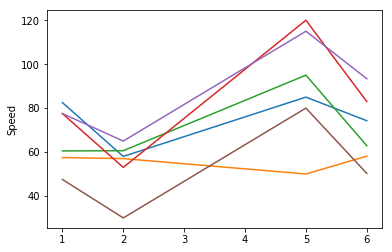

In [45]:
ax = sns.lineplot(x=fairy_stats.index, y="HP", data=fairy_stats)
ax = sns.lineplot(x=fairy_stats.index, y="Attack", data=fairy_stats)
ax = sns.lineplot(x=fairy_stats.index, y="Defense", data=fairy_stats)
ax = sns.lineplot(x=fairy_stats.index, y="Sp. Atk", data=fairy_stats)
ax = sns.lineplot(x=fairy_stats.index, y="Sp. Def", data=fairy_stats)
ax = sns.lineplot(x=fairy_stats.index, y="Speed", data=fairy_stats)
# ax = sns.lineplot(x=fairy_stats.index, y="Total", data=fairy_stats)

In [46]:
fighting_stats = poke_stats.loc[poke_stats["Type 1"] == "Fighting"]
s = pd.Series([1, 2, 3, 4, 5, 6])
fighting_stats = fighting_stats.set_index([s])
print(fighting_stats)

     Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Fighting  412.14  63.57  102.86    61.00    45.00    73.57  66.14
2  Fighting  332.50  42.50   65.00    65.00    35.00    72.50  52.50
3  Fighting  350.25  76.50   70.00    55.00    40.00    55.00  53.75
4  Fighting  405.00  55.00   90.00    55.00    75.00    55.00  75.00
5  Fighting  429.29  81.43  108.57    72.14    47.14    60.00  60.00
6  Fighting  447.67  80.00   99.33    71.67    63.00    60.67  73.00


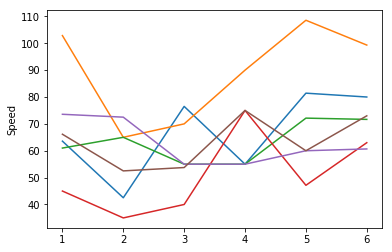

In [47]:
ax = sns.lineplot(x=fighting_stats.index, y="HP", data=fighting_stats)
ax = sns.lineplot(x=fighting_stats.index, y="Attack", data=fighting_stats)
ax = sns.lineplot(x=fighting_stats.index, y="Defense", data=fighting_stats)
ax = sns.lineplot(x=fighting_stats.index, y="Sp. Atk", data=fighting_stats)
ax = sns.lineplot(x=fighting_stats.index, y="Sp. Def", data=fighting_stats)
ax = sns.lineplot(x=fighting_stats.index, y="Speed", data=fighting_stats)
# ax = sns.lineplot(x=fighting_stats.index, y="Total", data=fighting_stats)

In [48]:
fire_stats = poke_stats.loc[poke_stats["Type 1"] == "Fire"]
s = pd.Series([1, 2, 3, 4, 5, 6])
fire_stats = fire_stats.set_index([s])
print(fire_stats)

  Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1   Fire  444.27  61.45   82.45    60.09    80.91    75.91  83.45
2   Fire  378.83  51.67   60.83    62.67    78.17    62.50  63.00
3   Fire  413.33  64.17   85.00    70.00    86.67    61.67  45.83
4   Fire  447.00  64.75   83.75    58.50    91.25    65.50  83.25
5   Fire  418.38  81.25   94.62    55.25    64.50    55.25  67.50
6   Fire  429.57  66.00   63.57    60.86    82.57    67.29  89.29


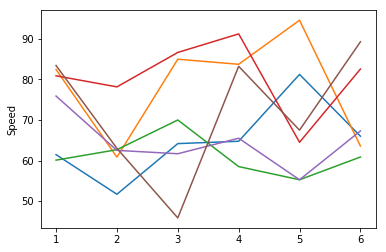

In [49]:
ax = sns.lineplot(x=fire_stats.index, y="HP", data=fire_stats)
ax = sns.lineplot(x=fire_stats.index, y="Attack", data=fire_stats)
ax = sns.lineplot(x=fire_stats.index, y="Defense", data=fire_stats)
ax = sns.lineplot(x=fire_stats.index, y="Sp. Atk", data=fire_stats)
ax = sns.lineplot(x=fire_stats.index, y="Sp. Def", data=fire_stats)
ax = sns.lineplot(x=fire_stats.index, y="Speed", data=fire_stats)
# ax = sns.lineplot(x=fire_stats.index, y="Total", data=fire_stats)

In [50]:
flying_stats = poke_stats.loc[poke_stats["Type 1"] == "Flying"]
s = pd.Series([6])
flying_stats = flying_stats.set_index([s])
print(flying_stats)

   Type 1  Total    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
6  Flying  390.0  62.5    50.0     57.5     71.0     60.0   89.0


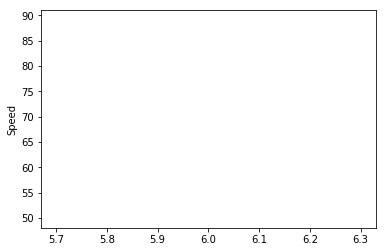

In [51]:
ax = sns.lineplot(x=flying_stats.index, y="HP", data=flying_stats)
ax = sns.lineplot(x=flying_stats.index, y="Attack", data=flying_stats)
ax = sns.lineplot(x=flying_stats.index, y="Defense", data=flying_stats)
ax = sns.lineplot(x=flying_stats.index, y="Sp. Atk", data=flying_stats)
ax = sns.lineplot(x=flying_stats.index, y="Sp. Def", data=flying_stats)
ax = sns.lineplot(x=flying_stats.index, y="Speed", data=flying_stats)
# ax = sns.lineplot(x=flying_stats.index, y="Total", data=flying_stats)

In [52]:
ghost_stats = poke_stats.loc[poke_stats["Type 1"] == "Ghost"]
s = pd.Series([1, 2, 3, 4, 5, 6])
ghost_stats = ghost_stats.set_index([s])
print(ghost_stats)

  Type 1  Total    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Ghost  405.0  45.0    50.0     45.0   115.00     55.0  95.00
2  Ghost  435.0  60.0    60.0     60.0    85.00     85.0  85.00
3  Ghost  375.0  42.0    75.0     80.0    59.00     79.0  40.00
4  Ghost  470.2  79.0    76.4     76.2    82.40     89.2  67.00
5  Ghost  390.2  53.2    41.0     87.0    91.00     75.0  43.00
6  Ghost  403.0  60.5    84.0     79.0    54.25     68.0  57.25


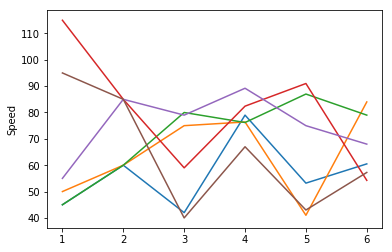

In [53]:
ax = sns.lineplot(x=ghost_stats.index, y="HP", data=ghost_stats)
ax = sns.lineplot(x=ghost_stats.index, y="Attack", data=ghost_stats)
ax = sns.lineplot(x=ghost_stats.index, y="Defense", data=ghost_stats)
ax = sns.lineplot(x=ghost_stats.index, y="Sp. Atk", data=ghost_stats)
ax = sns.lineplot(x=ghost_stats.index, y="Sp. Def", data=ghost_stats)
ax = sns.lineplot(x=ghost_stats.index, y="Speed", data=ghost_stats)
# ax = sns.lineplot(x=ghost_stats.index, y="Total", data=ghost_stats)

In [54]:
grass_stats = poke_stats.loc[poke_stats["Type 1"] == "Grass"]
s = pd.Series([1, 2, 3, 4, 5, 6])
grass_stats = grass_stats.set_index([s])
print(grass_stats)

  Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Grass  409.42  65.00   70.67    69.58    87.92    64.17  52.08
2  Grass  377.00  58.89   57.00    65.00    61.67    75.00  59.44
3  Grass  392.50  62.42   75.25    55.25    75.58    60.17  63.83
4  Grass  425.83  69.08   77.08    76.75    76.08    70.25  56.58
5  Grass  399.71  64.00   63.57    72.14    67.79    70.71  61.50
6  Grass  425.80  78.80   82.20    78.40    67.40    63.20  55.80


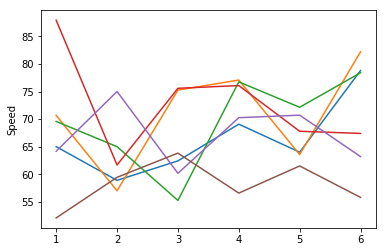

In [55]:
ax = sns.lineplot(x=grass_stats.index, y="HP", data=grass_stats)
ax = sns.lineplot(x=grass_stats.index, y="Attack", data=grass_stats)
ax = sns.lineplot(x=grass_stats.index, y="Defense", data=grass_stats)
ax = sns.lineplot(x=grass_stats.index, y="Sp. Atk", data=grass_stats)
ax = sns.lineplot(x=grass_stats.index, y="Sp. Def", data=grass_stats)
ax = sns.lineplot(x=grass_stats.index, y="Speed", data=grass_stats)
# ax = sns.lineplot(x=grass_stats.index, y="Total", data=grass_stats)

In [56]:
ground_stats = poke_stats.loc[poke_stats["Type 1"] == "Ground"]
s = pd.Series([1, 2, 3, 4, 5])
ground_stats = ground_stats.set_index([s])
print(ground_stats)

   Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Ground  374.38  58.12   81.88    86.25    39.38    50.62  58.12
2  Ground  420.00  81.67   85.00    95.00    45.00    55.00  58.33
3  Ground  390.00  55.00   76.00    67.00    57.00    73.00  62.00
4  Ground  475.00  91.50  104.75   112.75    51.50    61.00  53.50
5  Ground  406.88  79.00   94.38    59.25    49.50    61.12  63.62


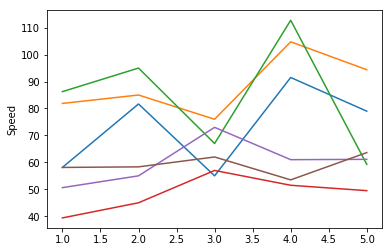

In [57]:
ax = sns.lineplot(x=ground_stats.index, y="HP", data=ground_stats)
ax = sns.lineplot(x=ground_stats.index, y="Attack", data=ground_stats)
ax = sns.lineplot(x=ground_stats.index, y="Defense", data=ground_stats)
ax = sns.lineplot(x=ground_stats.index, y="Sp. Atk", data=ground_stats)
ax = sns.lineplot(x=ground_stats.index, y="Sp. Def", data=ground_stats)
ax = sns.lineplot(x=ground_stats.index, y="Speed", data=ground_stats)
# ax = sns.lineplot(x=ground_stats.index, y="Total", data=ground_stats)

In [58]:
ice_stats = poke_stats.loc[poke_stats["Type 1"] == "Ice"]
s = pd.Series([1, 2, 3, 4, 5, 6])
ice_stats = ice_stats.set_index([s])
print(ice_stats)

  Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1    Ice  455.00  65.00   50.00    35.00   115.00    95.00  95.00
2    Ice  333.75  60.00   58.75    45.00    60.00    50.00  60.00
3    Ice  402.00  80.00   62.00    68.00    71.00    68.00  53.00
4    Ice  511.67  81.67   90.00    86.67    93.33    75.00  85.00
5    Ice  418.33  63.00   73.33    58.33    80.00    80.83  62.83
6    Ice  409.00  75.00   93.00   134.50    38.00    40.50  28.00


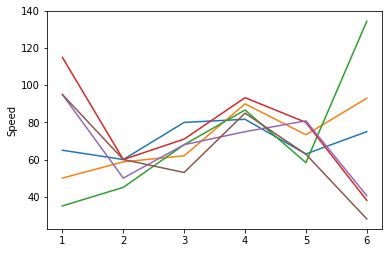

In [59]:
ax = sns.lineplot(x=ice_stats.index, y="HP", data=ice_stats)
ax = sns.lineplot(x=ice_stats.index, y="Attack", data=ice_stats)
ax = sns.lineplot(x=ice_stats.index, y="Defense", data=ice_stats)
ax = sns.lineplot(x=ice_stats.index, y="Sp. Atk", data=ice_stats)
ax = sns.lineplot(x=ice_stats.index, y="Sp. Def", data=ice_stats)
ax = sns.lineplot(x=ice_stats.index, y="Speed", data=ice_stats)
# ax = sns.lineplot(x=ice_stats.index, y="Total", data=ice_stats)

In [60]:
normal_stats = poke_stats.loc[poke_stats["Type 1"] == "Normal"]
s = pd.Series([1, 2, 3, 4, 5, 6])
normal_stats = normal_stats.set_index([s])
print(normal_stats)

   Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Normal  380.41  78.68   67.73    53.55    51.27    59.86  69.32
2  Normal  390.93  87.20   63.13    54.00    58.47    66.13  62.00
3  Normal  369.89  68.67   69.89    57.28    53.22    55.06  65.78
4  Normal  391.67  75.93   71.93    53.67    55.73    60.40  74.00
5  Normal  406.18  72.35   82.06    64.88    51.65    64.06  71.18
6  Normal  352.50  60.75   55.50    54.50    46.75    60.25  74.75


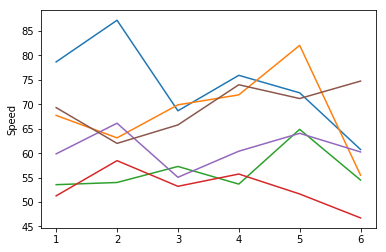

In [61]:
ax = sns.lineplot(x=normal_stats.index, y="HP", data=normal_stats)
ax = sns.lineplot(x=normal_stats.index, y="Attack", data=normal_stats)
ax = sns.lineplot(x=normal_stats.index, y="Defense", data=normal_stats)
ax = sns.lineplot(x=normal_stats.index, y="Sp. Atk", data=normal_stats)
ax = sns.lineplot(x=normal_stats.index, y="Sp. Def", data=normal_stats)
ax = sns.lineplot(x=normal_stats.index, y="Speed", data=normal_stats)
# ax = sns.lineplot(x=normal_stats.index, y="Total", data=normal_stats)

In [62]:
poison_stats = poke_stats.loc[poke_stats["Type 1"] == "Poison"]
s = pd.Series([1, 2, 3, 4, 5, 6])
poison_stats = poison_stats.set_index([s])
print(poison_stats)

   Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def   Speed
1  Poison  383.50  64.50   74.43    67.00    57.14    61.64   58.79
2  Poison  535.00  85.00   90.00    80.00    70.00    80.00  130.00
3  Poison  409.00  81.00   72.00    65.33    72.00    65.33   53.33
4  Poison  404.67  67.83   77.17    69.83    58.17    56.17   75.50
5  Poison  401.50  65.00   72.50    72.00    50.00    72.00   70.00
6  Poison  407.00  57.50   67.50    75.00    78.50    91.50   37.00


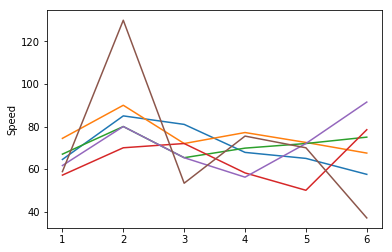

In [63]:
ax = sns.lineplot(x=poison_stats.index, y="HP", data=poison_stats)
ax = sns.lineplot(x=poison_stats.index, y="Attack", data=poison_stats)
ax = sns.lineplot(x=poison_stats.index, y="Defense", data=poison_stats)
ax = sns.lineplot(x=poison_stats.index, y="Sp. Atk", data=poison_stats)
ax = sns.lineplot(x=poison_stats.index, y="Sp. Def", data=poison_stats)
ax = sns.lineplot(x=poison_stats.index, y="Speed", data=poison_stats)
# ax = sns.lineplot(x=poison_stats.index, y="Total", data=poison_stats)

In [64]:
psychic_stats = poke_stats.loc[poke_stats["Type 1"] == "Psychic"]
s = pd.Series([1, 2, 3, 4, 5, 6])
psychic_stats = psychic_stats.set_index([s])
print(psychic_stats)

    Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Psychic  440.14  57.86   53.00    52.86    96.57    92.14  87.71
2  Psychic  442.67  84.67   65.83    63.50    83.33    69.33  76.00
3  Psychic  354.14  62.00   38.29    49.00    73.29    74.71  56.86
4  Psychic  428.25  63.25   62.50    70.00    68.75    96.25  67.50
5  Psychic  395.92  70.08   48.85    62.92    92.23    71.77  50.08
6  Psychic  410.50  68.00   48.00    65.00    73.00    70.50  86.00


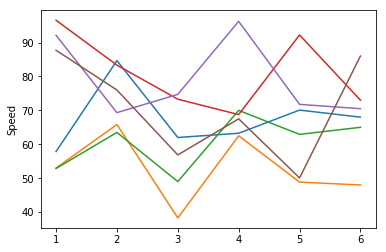

In [65]:
ax = sns.lineplot(x=psychic_stats.index, y="HP", data=psychic_stats)
ax = sns.lineplot(x=psychic_stats.index, y="Attack", data=psychic_stats)
ax = sns.lineplot(x=psychic_stats.index, y="Defense", data=psychic_stats)
ax = sns.lineplot(x=psychic_stats.index, y="Sp. Atk", data=psychic_stats)
ax = sns.lineplot(x=psychic_stats.index, y="Sp. Def", data=psychic_stats)
ax = sns.lineplot(x=psychic_stats.index, y="Speed", data=psychic_stats)
# ax = sns.lineplot(x=psychic_stats.index, y="Total", data=psychic_stats)

In [66]:
rock_stats = poke_stats.loc[poke_stats["Type 1"] == "Rock"]
s = pd.Series([1, 2, 3, 4, 5, 6])
rock_stats = rock_stats.set_index([s])
print(rock_stats)

  Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1   Rock  420.56  53.89   82.22   110.00    60.56    55.56  58.33
2   Rock  430.00  72.50   95.50    86.25    58.75    71.25  45.75
3   Rock  422.14  63.14   76.71    87.00    63.86    80.57  50.86
4   Rock  417.50  60.67   86.50   104.33    44.83    83.50  37.67
5   Rock  430.60  68.00  113.40    86.00    64.20    51.00  48.00
6   Rock  438.86  72.00   79.00    92.86    60.43    78.71  55.86


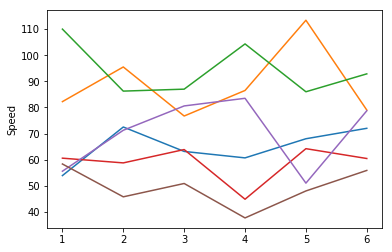

In [67]:
ax = sns.lineplot(x=rock_stats.index, y="HP", data=rock_stats)
ax = sns.lineplot(x=rock_stats.index, y="Attack", data=rock_stats)
ax = sns.lineplot(x=rock_stats.index, y="Defense", data=rock_stats)
ax = sns.lineplot(x=rock_stats.index, y="Sp. Atk", data=rock_stats)
ax = sns.lineplot(x=rock_stats.index, y="Sp. Def", data=rock_stats)
ax = sns.lineplot(x=rock_stats.index, y="Speed", data=rock_stats)
# ax = sns.lineplot(x=rock_stats.index, y="Total", data=rock_stats)

In [68]:
steel_stats = poke_stats.loc[poke_stats["Type 1"] == "Steel"]
s = pd.Series([2, 3, 4, 5, 6])
steel_stats = steel_stats.set_index([s])
print(steel_stats)

  Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
2  Steel  487.50  70.00   82.50   170.00    47.50    67.50  50.00
3  Steel  427.14  58.57   88.57   116.43    55.71    62.14  45.71
4  Steel  400.00  62.00   56.50   101.00    51.50   101.00  28.00
5  Steel  420.00  53.33   78.33    93.33    61.67    76.67  56.67
6  Steel  440.75  55.25  105.00    97.75    77.50    55.75  49.50


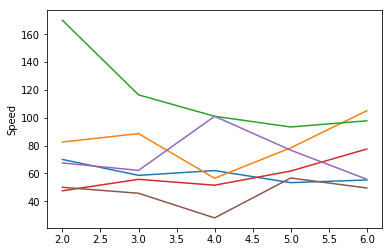

In [69]:
ax = sns.lineplot(x=steel_stats.index, y="HP", data=steel_stats)
ax = sns.lineplot(x=steel_stats.index, y="Attack", data=steel_stats)
ax = sns.lineplot(x=steel_stats.index, y="Defense", data=steel_stats)
ax = sns.lineplot(x=steel_stats.index, y="Sp. Atk", data=steel_stats)
ax = sns.lineplot(x=steel_stats.index, y="Sp. Def", data=steel_stats)
ax = sns.lineplot(x=steel_stats.index, y="Speed", data=steel_stats)
# ax = sns.lineplot(x=steel_stats.index, y="Total", data=steel_stats)

In [70]:
water_stats = poke_stats.loc[poke_stats["Type 1"] == "Water"]
s = pd.Series([1, 2, 3, 4, 5, 6])
water_stats = water_stats.set_index([s])
print(water_stats)

  Type 1   Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1  Water  411.21  64.54   70.25    77.50    64.82    66.39  67.71
2  Water  407.88  75.00   67.71    70.00    67.00    73.00  55.18
3  Water  393.78  68.87   71.22    64.13    68.87    60.30  60.39
4  Water  424.08  72.58   68.50    64.75    75.42    75.33  67.50
5  Water  423.71  78.00   73.35    69.12    74.76    62.29  66.18
6  Water  415.80  57.60   68.00    61.80    85.20    64.60  78.60


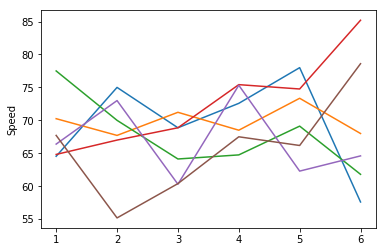

In [71]:
ax = sns.lineplot(x=water_stats.index, y="HP", data=water_stats)
ax = sns.lineplot(x=water_stats.index, y="Attack", data=water_stats)
ax = sns.lineplot(x=water_stats.index, y="Defense", data=water_stats)
ax = sns.lineplot(x=water_stats.index, y="Sp. Atk", data=water_stats)
ax = sns.lineplot(x=water_stats.index, y="Sp. Def", data=water_stats)
ax = sns.lineplot(x=water_stats.index, y="Speed", data=water_stats)
# ax = sns.lineplot(x=water_stats.index, y="Total", data=water_stats)